In [76]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [77]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

target_users = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@NYT']

In [83]:
# initialize dataframes to load in data through loops

'''
I usually do this step after I grab all the data, however I didn't want to think about keeping track of 
multiple sentiment arrays depending on target user (that method is clunky and hardcoded)

Thus I decided the better course of action would be to name the columns the same as the twitter @s and just
load in the data via set_value with the counter as index, twitter @ as column, value being the sentiment score
'''

compound_df = pd.DataFrame({"@BBCNews":'',
                   "@CBSNews":'',
                   "@CNN":'',
                   "@FoxNews":'',
                   "@NYT":''}, index=[0])

pos_df = pd.DataFrame({"@BBCNews":'',
                   "@CBSNews":'',
                   "@CNN":'',
                   "@FoxNews":'',
                   "@NYT":''}, index=[0])

neu_df = pd.DataFrame({"@BBCNews":'',
                   "@CBSNews":'',
                   "@CNN":'',
                   "@FoxNews":'',
                   "@NYT":''}, index=[0])

neg_df = pd.DataFrame({"@BBCNews":'',
                   "@CBSNews":'',
                   "@CNN":'',
                   "@FoxNews":'',
                   "@NYT":''}, index=[0])


for user in target_users:
    
    counter = 0

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # this was to track that I was getting the sentiment score properly 
            # bc at some point I had NaN values in my dataframe due to not looping properly
            #print(tweet["user"]["screen_name"] + ": " + format(compound))
            
            compound_df.set_value(counter, user, compound)
            pos_df.set_value(counter, user, pos)
            neu_df.set_value(counter, user, neu)
            neg_df.set_value(counter, user, neg)

            # Add to counter 
            counter = counter + 1

            
compound_df.to_csv('compoundscores.csv') 
pos_df.to_csv('positivescores.csv') 
neu_df.to_csv('neutralscores.csv') 
neg_df.to_csv('negativescores.csv') 

compound_df.head()

,@BBCNews,@CBSNews,@CNN,@FoxNews,@NYT
0,-0.3182,0,0,0.1531,0
1,0,0.4404,0,0,0
2,0,0.296,0.5574,0,0.25
3,-0.4767,-0.1027,0,-0.7072,-0.5574
4,0,-0.0258,0.2263,0.2144,-0.5574


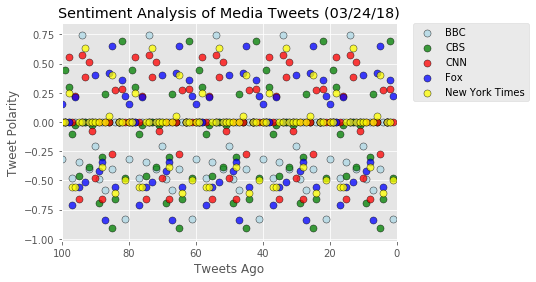

In [84]:
# 100 tweets
x_axis = np.arange(100, 0, -1)
plt.xlim(100, 0) #use this to flip the x-axis so it counts down from 100

# plot all the sentiments
plt.scatter(x_axis, compound_df['@BBCNews'], s = 50, color = 'lightblue', edgecolor = 'black', label = 'BBC', alpha = .75)
plt.scatter(x_axis, compound_df['@CBSNews'], s = 50, color = 'green', edgecolor = 'black', label = 'CBS', alpha = .75)
plt.scatter(x_axis, compound_df['@CNN'], s = 50, color = 'red', edgecolor = 'black', label = 'CNN', alpha = .75)
plt.scatter(x_axis, compound_df['@FoxNews'], s = 50, color = 'blue', edgecolor = 'black', label = 'Fox', alpha = .75)
plt.scatter(x_axis, compound_df['@NYT'], s = 50, color = 'yellow', edgecolor = 'black', label = 'New York Times', alpha = .75)

# legend
news_legend = plt.legend(frameon = True, edgecolor = 'black')

# move legend outside/away from chart to avoid blocking data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# label the chart and axes
now = datetime.datetime.now()
date_analyzed = now.strftime("%m/%d/%y")
plt.title('Sentiment Analysis of Media Tweets (' + date_analyzed + ')')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')

# for nicer styling
plt.style.use('ggplot')

plt.show()


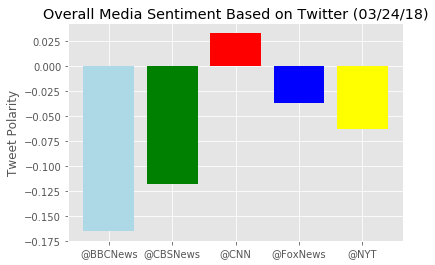

In [85]:
average_sentiments = []

# find average sentiment of each twitter account
BBC_avg = tweet_df['@BBCNews'].mean()
CBS_avg = tweet_df['@CBSNews'].mean()
CNN_avg = tweet_df['@CNN'].mean()
Fox_avg = tweet_df['@FoxNews'].mean()
NYT_avg = tweet_df['@NYT'].mean()

average_sentiments.append(BBC_avg)
average_sentiments.append(CBS_avg)
average_sentiments.append(CNN_avg)
average_sentiments.append(Fox_avg)
average_sentiments.append(NYT_avg)

bar_x_axis = np.arange(len(target_users))
colors = ['lightblue', 'green', 'red', 'blue', 'yellow']
plt.bar(bar_x_axis, average_sentiments, color=colors, align='center', alpha=1.0)

plt.xticks(bar_x_axis, target_users)
plt.title('Overall Media Sentiment Based on Twitter (' + date_analyzed + ')')
plt.ylabel('Tweet Polarity')

plt.style.use('ggplot')

plt.show()

<h2> Trends </h2>

<ul>
  <li>It seems like all the news account twitters except for Fox have an overall negative sentiment </li>
  <li>It's actually not that surprising that CNN has an overall positive sentiment, since I have heard peers have express preference for CNN as a news outlet, both for its relatively factual/accurate reporting and atttitude </li>
  <li>BBC and CBS have fairly strong negative sentiments, while Fox and New York Times have milder negative sentiments</li>
</ul>